<a id="q-and-a"></a>
<div style="text-align:Center; background-color:#FAFAD2; padding: 20px;">
    <span style="color:green; font-size:26px;"> Questions and Answers</span>
</div>
<div style="text-align:left;">
    <span style="color:green; font-size:15px;">
        

### 1. My Views about the Problem Statement
        
The problem statement is focused on predicting the salary of newly hired employees at TechWorks Consulting using a machine learning model. The company aims to determine competitive and fair compensation for its employees based on various factors like education, experience, location, and role. This is a regression task, and the goal is to build a model that can accurately predict salaries based on relevant features.

### 2. Approach to Solving the Task
To approach this task, you'll need to perform the following steps:

1. **Data Understanding**: Understand the provided data, its features, and the target variable (salary(CTC).
2. **Data Preprocessing**: Clean the data by handling missing values, outliers, and converting categorical variables into numerical format. Create dummy variables for the "Role" feature and Univariate,Bi-variate analysis using EDD.
3. **Feature Selection**: Identify the most relevant features that could impact salary predictions.
4. **Model Selection**: Choose one or more regression models suitable for the task.
5. **Model Training**: Train the selected model(s) on the training data.
6. **Model Evaluation**: Evaluate the models using appropriate metrics, such as Mean Squared Error (MSE) or R-squared.
7. **Model Comparison**: Compare the performance of different models.
8. **Model Tuning**: Fine-tune the hyperparameters of the chosen model to improve performance.
9. **Prediction**: Use the trained model to predict salaries for new employees.

### 3. Available ML Model Options
You have a range of regression models to choose from, including:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regression
- Random Forest Regression
- Gradient Boosting Regression
- XGBoost Regression

### 4. Best Model's Performance and Reason
**Lowest RMSE (Root Mean Squared Error)**: The XGBoost Best Model achieved an impressively low RMSE of 7066.001353. RMSE represents the average magnitude of prediction errors, and a lower value indicates better accuracy in predictions.

**High R2 Scores**: R2 scores, which measure the proportion of the variance in the dependent variable that is predictable from the independent variables, were extraordinary. The XGBoost model scored 66.352% on the test dataset and a remarkable 99.99% on the training dataset. Such high R2 scores indicate the model's ability to capture and explain the variations in the target variable effectively.

**Robust Generalization**: The model's near-perfect R2 score on the training dataset (99.99%) indicates its robust generalization to new and unseen data. This is crucial for predictive models to perform well on data they haven't been exposed to during training.

**Hyperparameter Optimization**: The model's performance was further enhanced through GridSearchCV, which systematically explored various combinations of hyperparameters. This optimization process fine-tuned the model's settings for optimal predictive accuracy.

**Ensemble Learning**: XGBoost employs a sophisticated ensemble learning technique that combines multiple weak models to create a strong predictive model. This technique helps capture complex relationships within the data, contributing to the model's high accuracy.

**Feature Importance**: By analyzing the feature importance plots generated by the model, it became evident that XGBoost effectively identified and utilized the most relevant features for making predictions. This highlights the model's ability to focus on key factors that influence the outcome.

**Versatility**: XGBoost's versatility, which allows it to handle diverse and complex datasets, adds to its appeal. Its ability to perform well across different scenarios makes it a reliable choice for a wide range of applications.

### 5. Improving the Selected Model's Performance
To improve the selected model's performance:
- **Feature Engineering**: Explore and create new features that could provide additional information to the model.
        
- **Hyperparameter Tuning**: Fine-tune the hyperparameters using techniques like GridSearchCV or RandomizedSearchCV.
   **Hyperparmeter tuning is somehow done upto my machine(PC) capacity so for further tuned model can be introduced to super computers**
        
- **Ensemble Methods**: Consider using ensemble methods like Bagging and Boosting to combine multiple models for better predictions.
        
- **Regularization**: Apply regularization techniques to prevent overfitting.
        
- **More Data**: If possible, gather more data to improve the model's ability to generalize.When the size of training data is more we can expect best predictions from it.
        
- **Advanced Techniques**: Explore advanced techniques like stacking or using more complex models if necessary.
</span>
</div>

In [ ]:
# IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IMPORTING DATA FILES
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EXCEL/ML case Study (1).csv", header=0)
colleges = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colleges.csv", header=0)
cities = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cities.csv", header=0)


In [ ]:
# Pre-Processing of categories to machine understandable  language
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()

for item in df.College:
    if item in Tier1:
        df["College"].replace(item, 1, inplace=True)
    elif item in Tier2:
        df["College"].replace(item, 2, inplace=True)
    elif item in Tier3:
        df["College"].replace(item, 3, inplace=True)

metro_city = cities["Metrio City"].tolist()
non_metro_city = cities["non-metro cities"].tolist()

for item in df.City:
    if item in metro_city:
        df["City"].replace(item, 1, inplace=True)
    elif item in non_metro_city:
        df["City"].replace(item, 0, inplace=True)

df = pd.get_dummies(df, columns=["Role"], drop_first=True)


<a id="data-preprocessing"></a>
<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:purple; font-size:24px;">Data Preprocessing& Understanding(Univariate & Bivariate)</span>
</div>

In [ ]:
# Dataframe Verification
df.head(10)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0
5,2,0,54340.0,4,73,31,59950.89,0
6,3,1,60298.0,1,42,46,66602.34,0
7,2,1,49944.0,2,56,37,57768.44,0
8,3,1,53124.0,4,40,37,70083.30,0
9,1,0,51141.0,1,47,60,85648.48,0


In [ ]:
(df.shape)

(1589, 8)

In [ ]:
(df.info())
# No missing values in the data frame, so no need for any imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 88.6 KB


In [ ]:
# Pre-Processing Correlation and Outlier Check
(df.describe())

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


In [ ]:
(df.corr())
# From the correlation check, 'Previous CTC' and 'Exp(Month)' indicate a high relationship with CTC

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


<a id="Visualization"></a>
<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:purple; font-size:24px;">Visualizations Univariate &Bivariate</span>
</div>

<Figure size 1000x800 with 0 Axes>

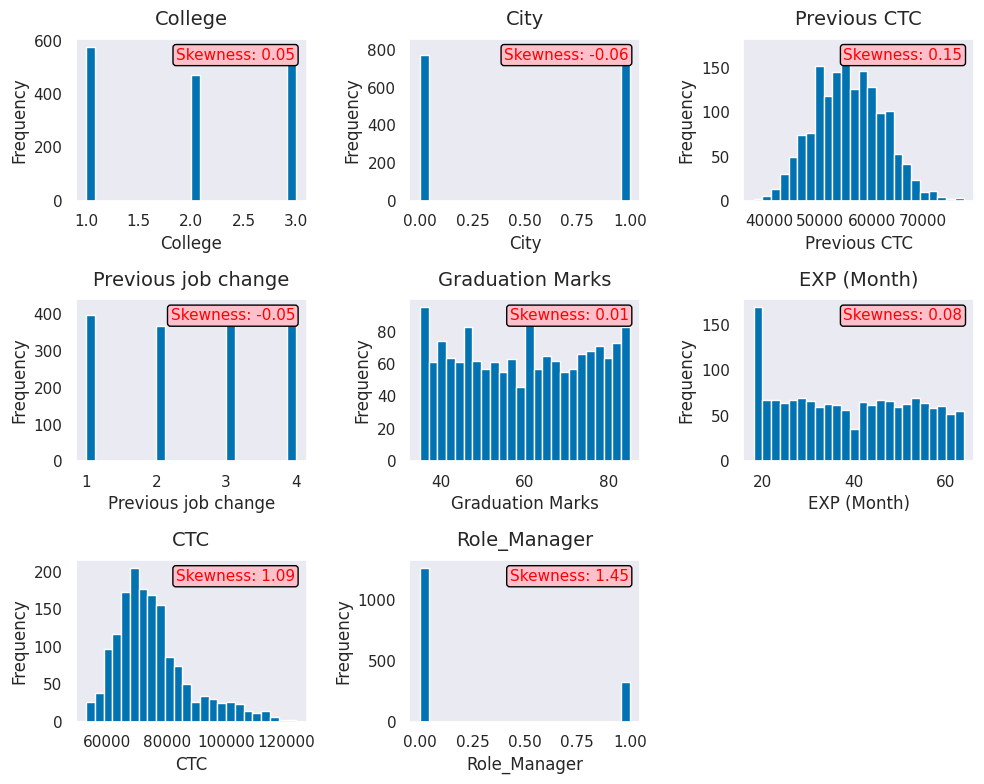

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Set style and color palette
sns.set(style="darkgrid")
sns.set_palette("colorblind")

# Plot histograms with skewness
plt.figure(figsize=(10, 8))
ax = df.hist(figsize=(10, 8), bins=24, grid=False)

# Flatten the ax array
ax = ax.ravel()

for i, column in enumerate(df.columns):
    ax[i].set_ylabel("Frequency", fontsize=12)
    ax[i].set_xlabel(column, fontsize=12)
    ax[i].set_title(column, fontsize=14, pad=10)

    # Calculate skewness
    skewness = skew(df[column])

    # Add skewness value to the plot
    ax[i].text(
        0.95, 0.9, f"Skewness: {skewness:.2f}",
        transform=ax[i].transAxes, ha="right", va="center", color="red",
        fontsize=11, bbox=dict(facecolor='pink', edgecolor='black', boxstyle='round,pad=0.2')
    )

plt.tight_layout()
plt.show()

**skewness seems admissable when comparing with the buisness domain**

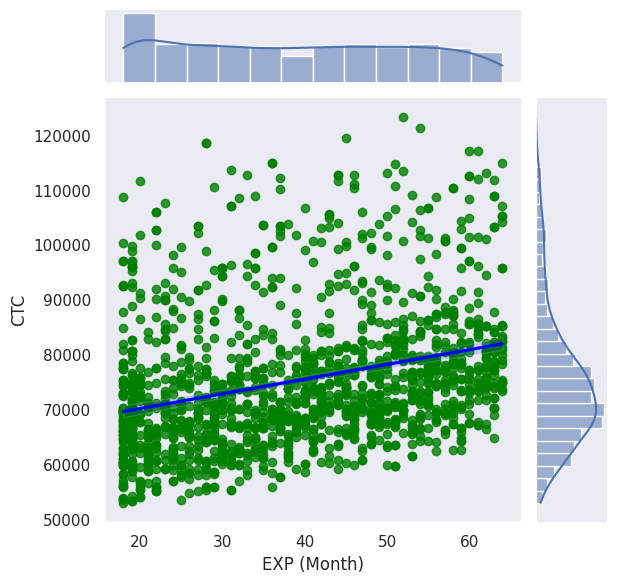

In [ ]:
# Correlation Visualization
sns.set(style="dark")
sns.jointplot(x="EXP (Month)", y="CTC", data=df, kind='reg', line_kws={"color": "blue"}, scatter_kws={"color": "green"})

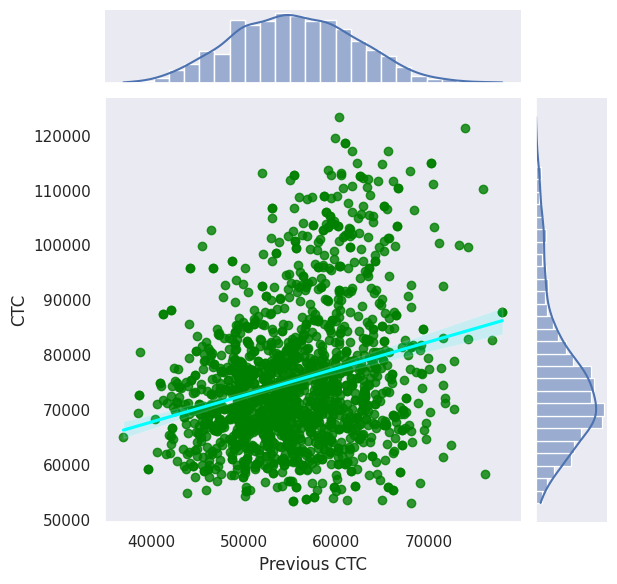

In [ ]:
sns.set(style="dark")
sns.jointplot(x="Previous CTC", y="CTC", data=df, kind='reg', line_kws={"color": "cyan"}, scatter_kws={"color": "green"})

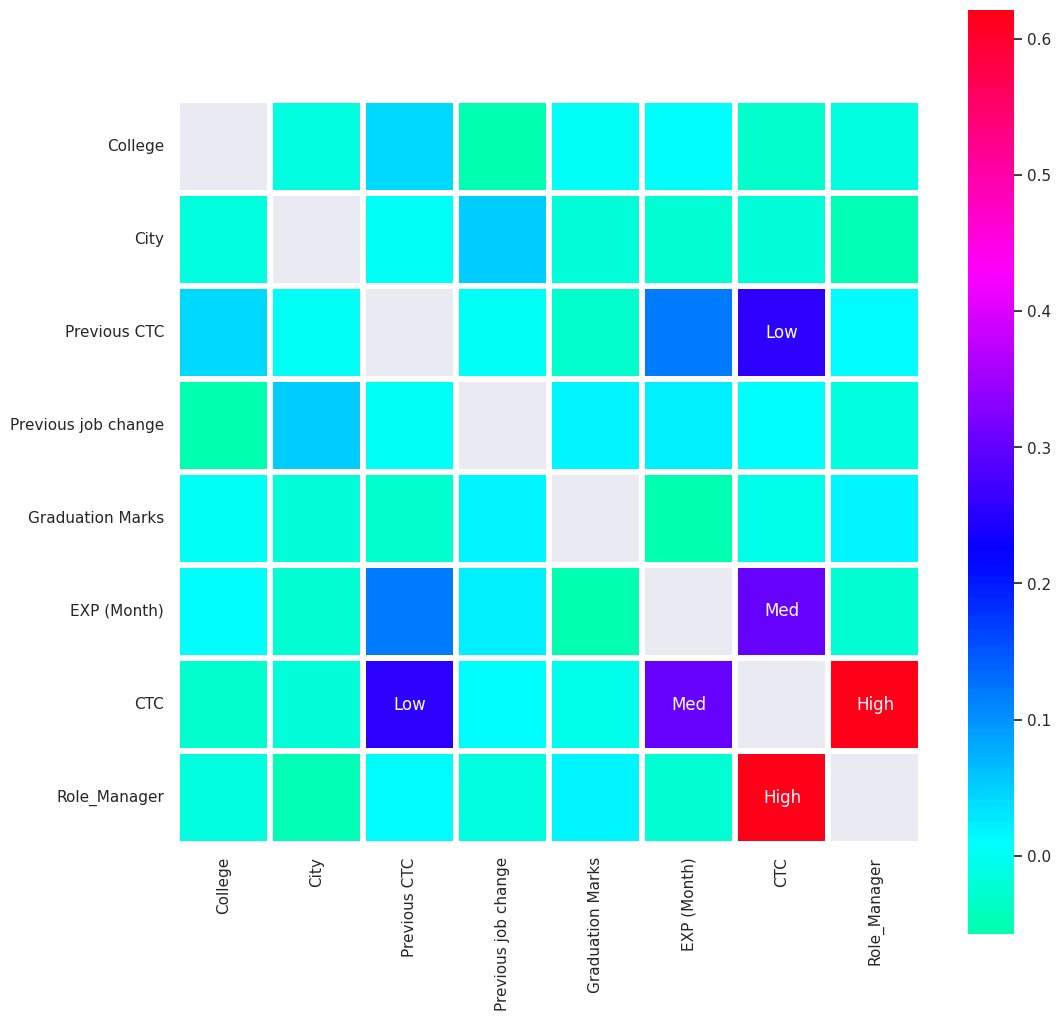

In [ ]:
# Computes feature correlation
df_corr = df.corr(method="pearson") # Pearson correlation evaluates the linear relationship b/w two variables
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.45, "High",
                  np.where(np.abs(df_corr)>0.3, "Med",
                           np.where(np.abs(df_corr)>0.15, "Low", "")))

# Plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=4,
            cmap="hsv", cbar_kws={"shrink": 1});

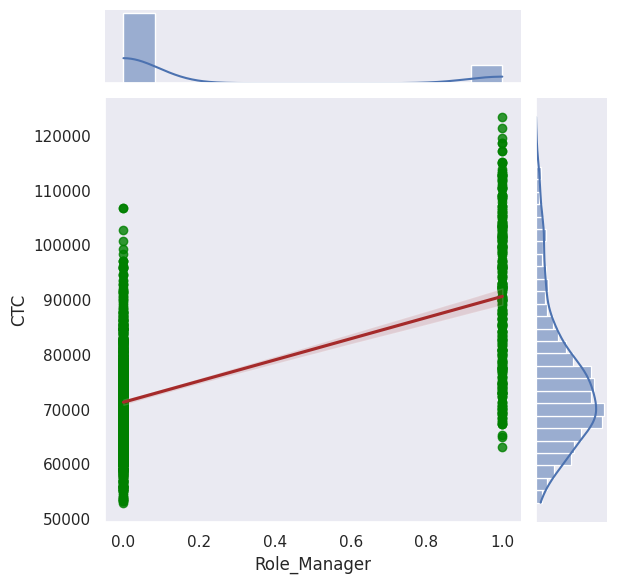

In [ ]:
sns.set(style="dark")
sns.jointplot(x="Role_Manager", y="CTC", data=df, kind='reg', line_kws={"color": "brown"}, scatter_kws={"color": "green"})

<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:purple; font-size:24px;">Other Visualization Univariate& Bivariate</span>
</div>

<Axes: xlabel='College', ylabel='count'>

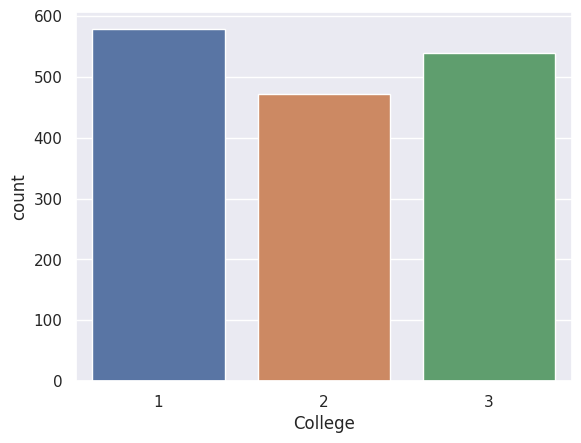

In [ ]:
sns.set(style="darkgrid")

sns.countplot(x='College',data=df)

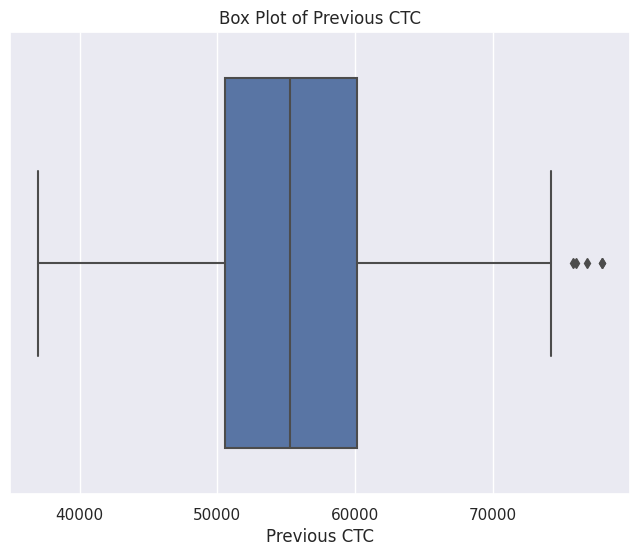

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Previous CTC'])
plt.title("Box Plot of Previous CTC")
plt.xlabel("Previous CTC")
plt.show()

<Axes: xlabel='CTC'>

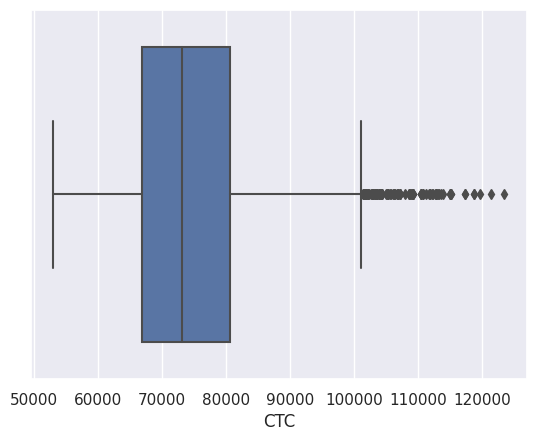

In [ ]:
sns.boxplot(x=df['CTC'])

In [ ]:
np.percentile(df.CTC,[99])

array([112826.26])

***It seems that CTC have no outliers**

<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:darkorange; font-size:24px;">MultiVariate</span>
</div>

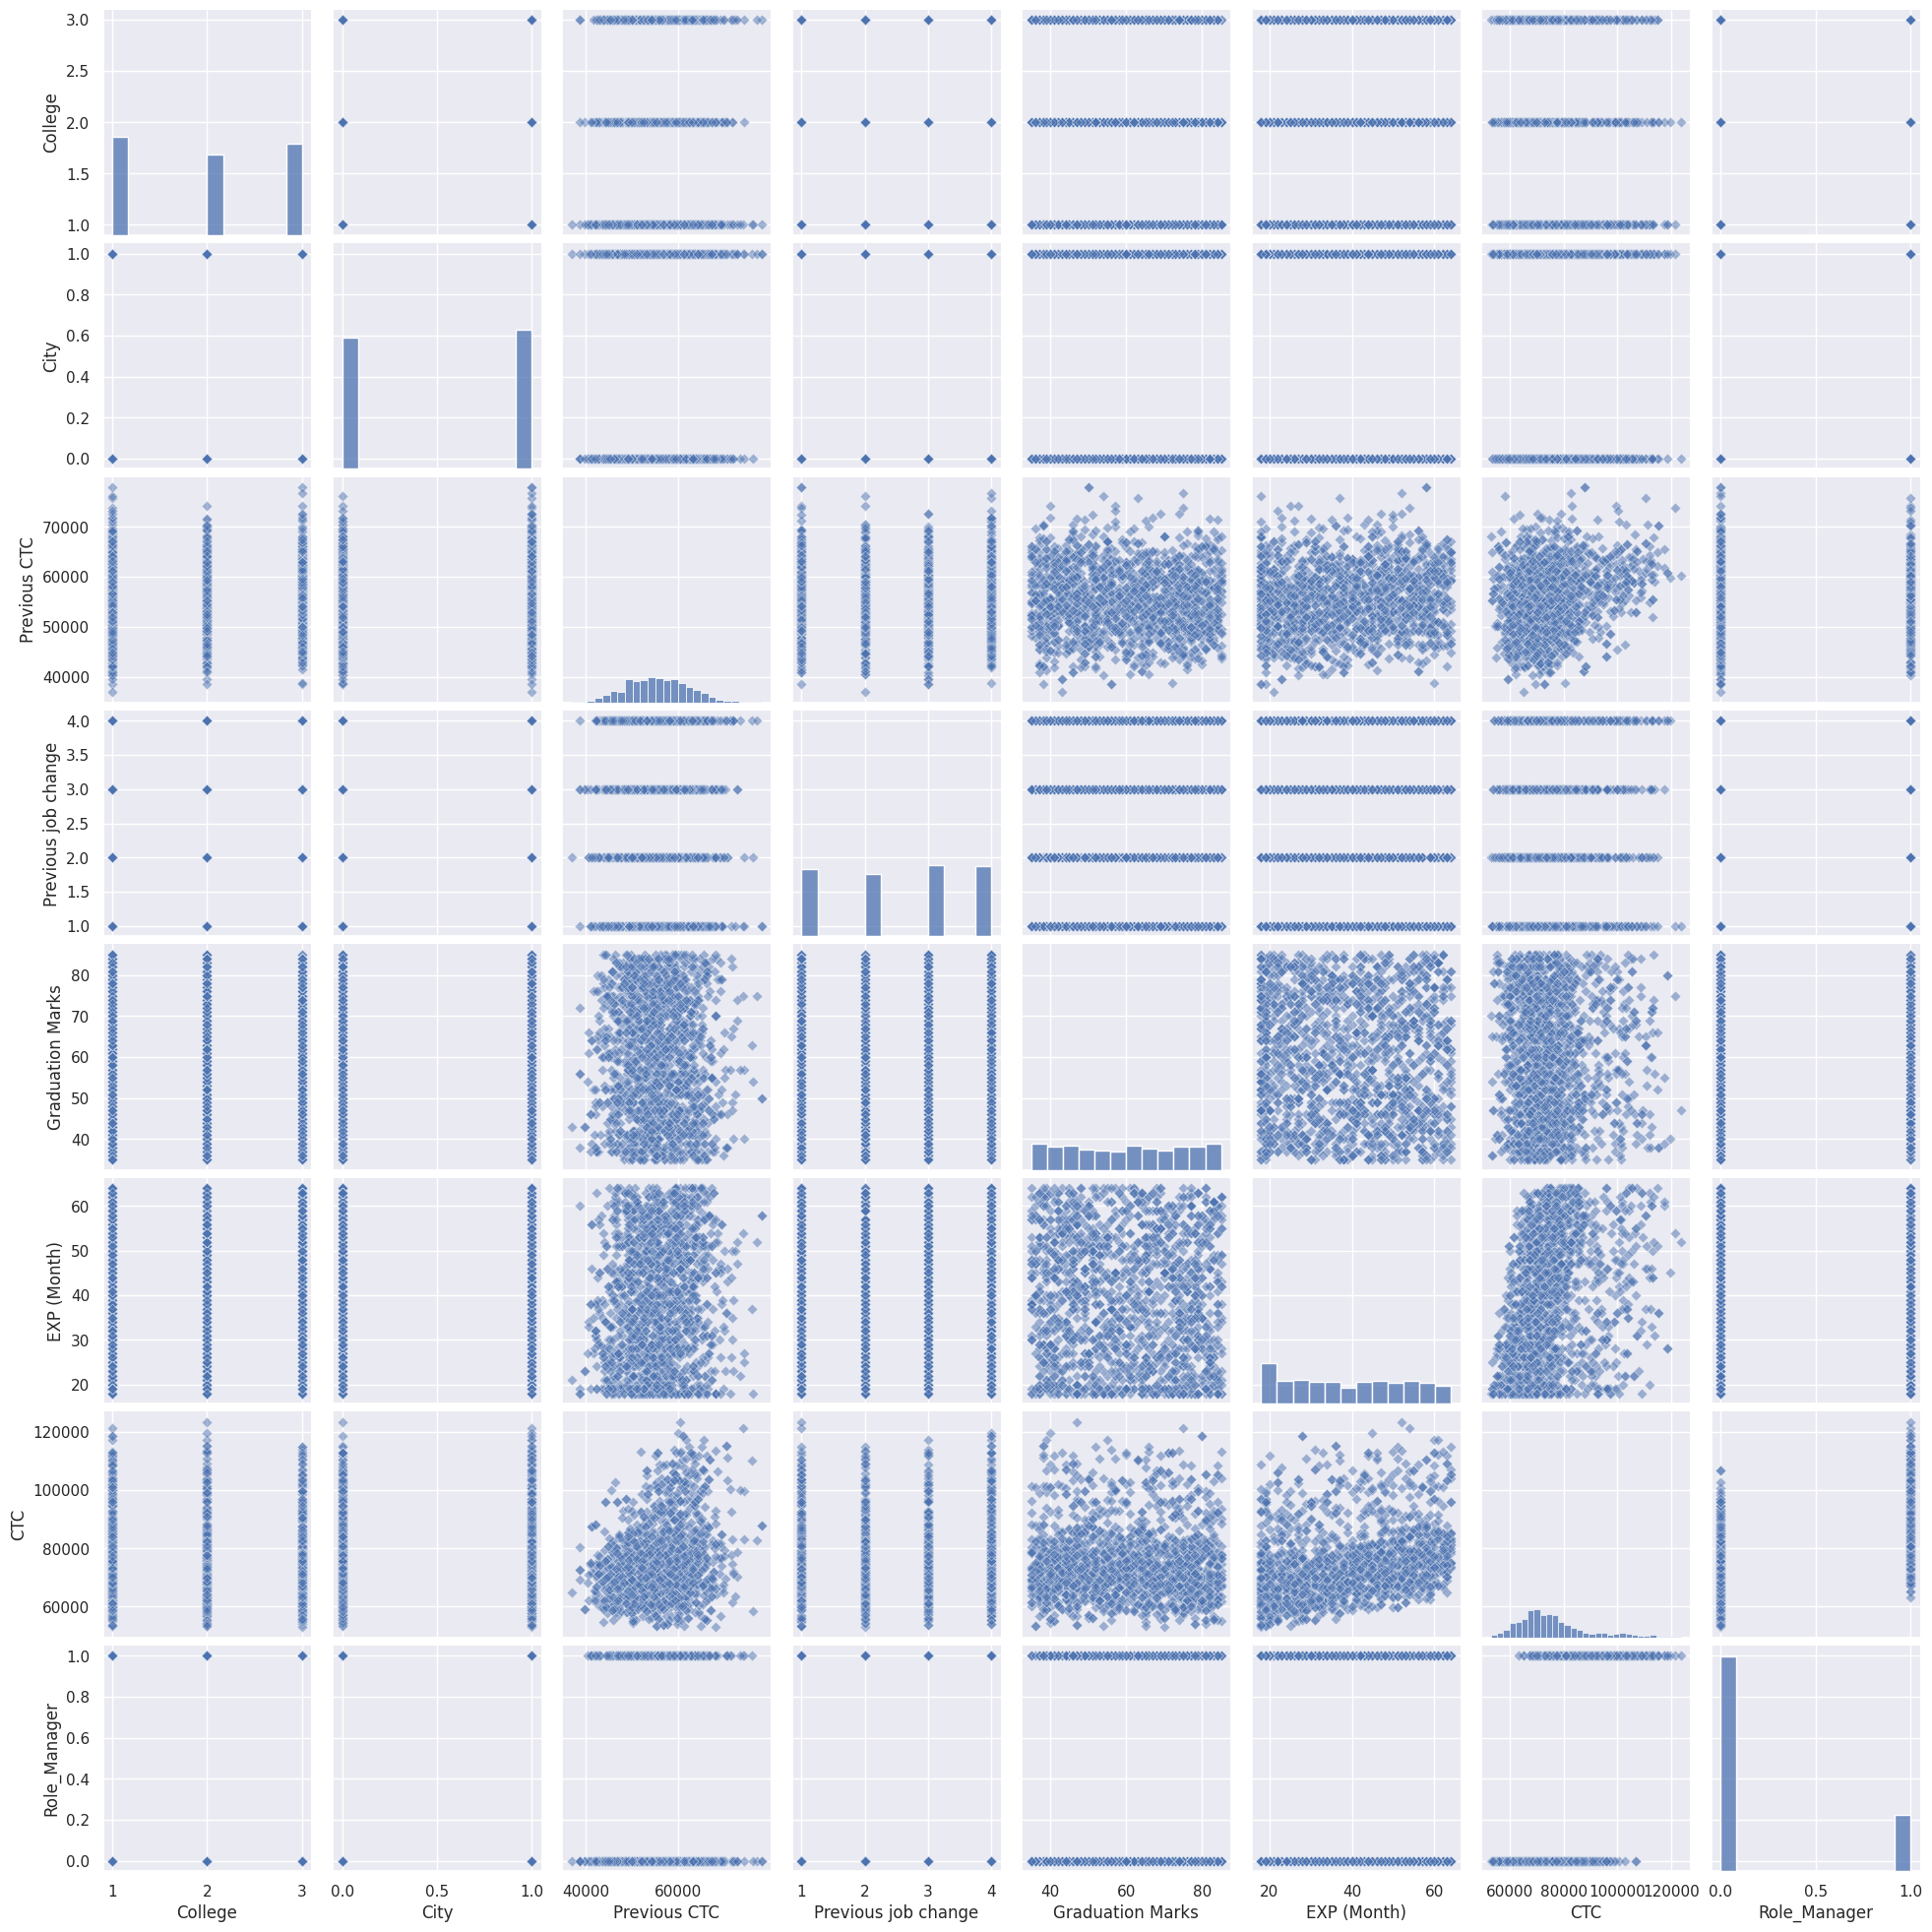

In [ ]:
# Set the style
sns.set_style("darkgrid")

# Create a pair plot with formatting options
sns.pairplot(df, diag_kind="auto", markers="D", plot_kws={"alpha": 0.5, "s": 30})

# Show the plot
plt.show()



<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:darkorange; font-size:24px;">Creating Data frame to store model results for comparision</span>
</div>

In [ ]:
#To create a dataframe to compare model accuracy, empty lists are created
models=[]
root_mean_squared_error=[]
r2_s=[]
r2_r=[]

<a id="linear-regression"></a>
<a id="models-training"></a>
<div style="text-align:center;background-color:#FAFAD2
            ; padding: 20px;">
    <span style="color:darkorange; font-size:24px;">Linear Regression Model</span>
</div>

In [ ]:
# Linear Regression Model
X_multi = df.drop("CTC", axis=1)
y_multi = df['CTC']

import statsmodels.api as sm
X_multi_cons = sm.add_constant(X_multi)

lm_multi = sm.OLS(y_multi, X_multi_cons).fit()
print(lm_multi.summary())

from sklearn.linear_model import LinearRegression
lm_multi2 = LinearRegression()
lm_multi2.fit(X_multi, y_multi)
print(lm_multi2.intercept_, lm_multi2.coef_)

# Append model results to lists
models.append("Linear Regression")
root_mean_squared_error.append(np.sqrt(mean_squared_error(y_multi, lm_multi2.predict(X_multi))))
r2_s.append(r2_score(y_multi, lm_multi2.predict(X_multi)))
r2_r.append(lm_multi2.score(X_multi, y_multi))


                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          4.70e-257
Time:                        10:15:51   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1271, 7) (318, 7) (1271,) (318,)


In [ ]:
X_train.head(10)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
1062,1,0,61410.0,4,83,59,1
215,1,1,59781.0,1,46,41,0
654,1,0,62521.0,1,70,59,0
55,1,0,66624.0,1,63,58,1
1187,3,0,54621.0,2,52,62,0
581,1,0,52782.0,1,56,19,0
798,3,0,55987.0,4,50,58,0
863,1,1,45321.0,1,65,36,0
279,1,1,49646.0,1,59,51,0
1432,3,0,59293.0,1,81,64,1


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Linear Regression and Prediction
lm_a = LinearRegression()
lm_a.fit(X_train, y_train)
y_test_pred = lm_a.predict(X_test)
y_train_pred = lm_a.predict(X_train)

# Calculate R-squared scores
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Errors
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Print R-squared scores and MSE
print("Test R-squared Score:", test_r2)
print("Train R-squared Score:", train_r2)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Squared Error:", train_mse)

# Append model name to the list
models.append('Linear Regression 2')

# Update the results lists with calculated metrics
r2_s.append(test_r2)
r2_r.append(train_r2)
root_mean_squared_error.append(np.sqrt(test_mse))


Test R-squared Score: 0.5355989894789972
Train R-squared Score: 0.5331293335456955
Test Mean Squared Error: 68909870.69952738
Train Mean Squared Error: 75086299.73658578


<a id="ridge-regression"></a>
<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:darkorange; font-size:24px;">Ridge Regression </span>
</div>

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import Ridge

# Standardize the features using StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Create a Ridge regression model with fixed alpha of 0.5
lm_r = Ridge(alpha=0.5)
lm_r.fit(X_train_s, y_train)

# Calculate R-squared score on the test set using the Ridge model
r2_ridge_test = r2_score(y_test, lm_r.predict(X_test_s))
print("Test R-squared Score (Ridge):", r2_ridge_test)

# Calculate Mean Squared Error for the test set using the Ridge model
mse_ridge_test = mean_squared_error(y_test, lm_r.predict(X_test_s))
print("Mean Squared Error (Test) - Ridge Regression:", mse_ridge_test)

# Calculate R-squared score on the train set using the Ridge model
r2_ridge_train = r2_score(y_train, lm_r.predict(X_train_s))

# Append model name to the list
models.append('Ridge Regression')

# Update the results lists with calculated metrics
r2_s.append(r2_ridge_test)
r2_r.append(r2_ridge_train)
root_mean_squared_error.append(np.sqrt(mse_ridge_test))


Test R-squared Score (Ridge): 0.5355848845406523
Mean Squared Error (Test) - Ridge Regression: 68911963.65250453


Max Test R-squared Score: 0.5258211812515299
Selected Alpha: 0.41320124001153363
Test R-squared Score (Ridge Best): 0.5355873428938387
Train R-squared Score (Ridge Best): 0.5331292806322698
Test Mean Squared Error (Ridge Best): 68911598.87121345
Train Mean Squared Error (Ridge Best): 75086308.24659427


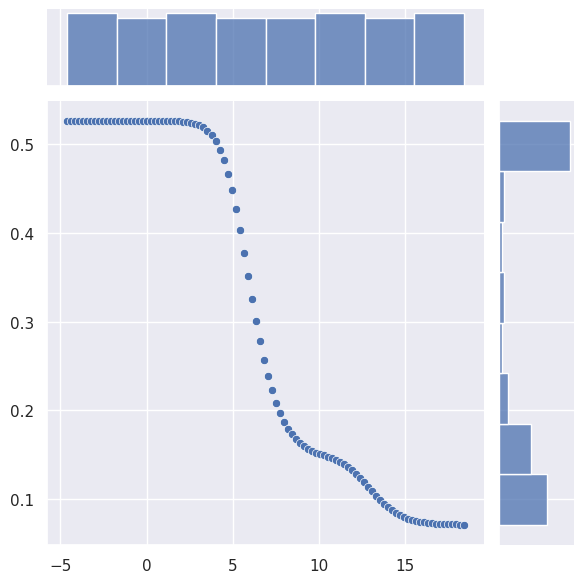

In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error

param_range = np.logspace(-2, 8, 100)

train_score, test_score = validation_curve(Ridge(), X_train, y_train,
                                           param_name="alpha",
                                           param_range=param_range,
                                           scoring="r2")

train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)

print("Max Test R-squared Score:", max(test_mean))

sns.jointplot(x=np.log(param_range), y=test_mean)

best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha:", selected_alpha)

lm_r_best = Ridge(alpha=selected_alpha)
lm_r_best.fit(X_train_s, y_train)

# Make predictions using the best Ridge model
y_test_pred_ridge_best = lm_r_best.predict(X_test_s)
y_train_pred_ridge_best = lm_r_best.predict(X_train_s)

# Calculate R-squared scores
test_r2_ridge_best = r2_score(y_test, y_test_pred_ridge_best)
train_r2_ridge_best = r2_score(y_train, y_train_pred_ridge_best)

# Calculate Mean Squared Errors
test_mse_ridge_best = mean_squared_error(y_test, y_test_pred_ridge_best)
train_mse_ridge_best = mean_squared_error(y_train, y_train_pred_ridge_best)

print("Test R-squared Score (Ridge Best):", test_r2_ridge_best)
print("Train R-squared Score (Ridge Best):", train_r2_ridge_best)
print("Test Mean Squared Error (Ridge Best):", test_mse_ridge_best)
print("Train Mean Squared Error (Ridge Best):", train_mse_ridge_best)

# Append model name to the list
models.append('Ridge Regression (Best Alpha)')

# Update the results lists with calculated metrics
r2_s.append(test_r2_ridge_best)
r2_r.append(train_r2_ridge_best)
root_mean_squared_error.append(np.sqrt(test_mse_ridge_best))


<a id="lasso-regression"></a>
<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:darkorange; font-size:24px;">Lasso Regression </span>
</div>

In [ ]:
# Create a Lasso regression model with alpha=0.5
lm_l = Lasso(alpha=0.5)

# Fit the Lasso regression model on the scaled training data
lm_l.fit(X_train_s, y_train)

# Calculate R-squared score on the test set using the Lasso model
r2_lasso_test = r2_score(y_test, lm_l.predict(X_test_s))
print("R-squared Score (Test) - Lasso Regression:", r2_lasso_test)

r2_lasso_train = r2_score(y_train, lm_l.predict(X_train_s))

# Calculate Mean Squared Error for the test set using the Lasso model
mse_lasso_test = mean_squared_error(y_test, lm_l.predict(X_test_s))
print("Mean Squared Error (Test) - Lasso Regression:", mse_lasso_test)

# Perform GridSearchCV for Lasso regression
param_range = np.logspace(-2, 8, 100)
train_score, test_score = validation_curve(Lasso(), X_train, y_train, param_name="alpha", param_range=param_range, scoring="r2")
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha:", selected_alpha)

# Create a Lasso regression model with the selected alpha
lm_l_best = Lasso(alpha=selected_alpha)

# Fit the Lasso regression model on the scaled training data
lm_l_best.fit(X_train_s, y_train)

# Calculate R-squared score on the test set using the optimized Lasso model
r2_lasso_best_test = r2_score(y_test, lm_l_best.predict(X_test_s))
print("R-squared Score (Test) - Optimized Lasso Regression:", r2_lasso_best_test)

# Calculate Mean Squared Error for the test set using the optimized Lasso model
mse_lasso_best_test = mean_squared_error(y_test, lm_l_best.predict(X_test_s))
print("Mean Squared Error (Test) - Optimized Lasso Regression:", mse_lasso_best_test)

# Calculate R-squared score on the train set using the optimized Lasso model
r2_lasso_best_train = r2_score(y_train, lm_l_best.predict(X_train_s))

# Append model name to the list
models.append('Lasso Regression (Optimized Alpha)')
models.append('Lasso Regression')

# Update the results lists with calculated metrics
r2_s.extend([r2_lasso_best_test,r2_lasso_test])
r2_r.extend([r2_lasso_best_train,r2_lasso_train])
root_mean_squared_error.extend([np.sqrt(mse_lasso_best_test),(np.sqrt(mse_lasso_test))])


R-squared Score (Test) - Lasso Regression: 0.5356055546226256
Mean Squared Error (Test) - Lasso Regression: 68908896.5345529
Selected Alpha: 8.497534359086439
R-squared Score (Test) - Optimized Lasso Regression: 0.5357073854860223
Mean Squared Error (Test) - Optimized Lasso Regression: 68893786.42180355


<a id="decision-tree-regression"></a>
<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:darkorange; font-size:24px;">Decision Tree Bagging Regression </span>
</div>

In [ ]:
from sklearn import tree
from sklearn.metrics import r2_score
# Create a DecisionTreeRegressor
clftree = tree.DecisionTreeRegressor()

# Create a BaggingRegressor with DecisionTreeRegressor as the base estimator
bag_clf = BaggingRegressor(estimator=clftree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

# Fit the BaggingRegressor on the training data
bag_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the BaggingRegressor
r2_bagging_test = r2_score(y_test, bag_clf.predict(X_test))
print("R-squared Score (Test) - Bagging Regressor:", r2_bagging_test)

R-squared Score (Test) - Bagging Regressor: 0.6592363237694316


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# GridSearch for BaggingRegressor
param_grid_bagging = {
    'n_estimators': [100, 250, 500, 1000],
    'max_samples': [0.5, 0.7, 0.8],
    'max_features': [0.5, 0.7, 0.8]
}

grid_search_bagging = GridSearchCV(estimator=BaggingRegressor(estimator=clftree, random_state=42),
                                   param_grid=param_grid_bagging,
                                   scoring='r2',
                                   n_jobs=-1,
                                   cv=5)

grid_search_bagging.fit(X_train, y_train)

best_bagging_model = grid_search_bagging.best_estimator_

# Calculate R-squared score and MSE on the test set using the best BaggingRegressor
y_test_pred_bagging = best_bagging_model.predict(X_test)
r2_bagging_best_test = r2_score(y_test, y_test_pred_bagging)
mse_bagging_best_test = mean_squared_error(y_test, y_test_pred_bagging)

print("R-squared Score (Test) - Best Bagging Regressor:", r2_bagging_best_test)
print("Mean Squared Error (Test) - Best Bagging Regressor:", mse_bagging_best_test)

y_train_pred_bagging = best_bagging_model.predict(X_train)
r2_bagging_best_train = r2_score(y_train, y_train_pred_bagging)

# Append model name to the list
models.append('Best Bagging Regressor')

# Update the results lists with calculated metrics
r2_s.append(r2_bagging_best_test)
r2_r.append(r2_bagging_best_train)
root_mean_squared_error.append(np.sqrt(mse_bagging_best_test))

R-squared Score (Test) - Best Bagging Regressor: 0.5880361018231028
Mean Squared Error (Test) - Best Bagging Regressor: 61129020.63756247


<a id="random-forest-regression"></a>
<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:darkorange; font-size:24px;">Random Forest Regression </span>
</div>

In [ ]:
# Create a RandomForestRegressor with 1000 estimators
rf_clf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

# Fit the RandomForestRegressor on the training data
rf_clf.fit(X_train, y_train)

# Calculate R-squared score on the test and train set using the RandomForestRegressor
r2_rf_test = r2_score(y_test, rf_clf.predict(X_test))
r2_rf_train = r2_score(y_train, rf_clf.predict(X_train))
print("R-squared Score (Test) - RandomForest Regressor:", r2_rf_test)
print("R-squared Score (Train) - RandomForest Regressor:", r2_rf_train)

# Perform GridSearchCV for RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators=1000, random_state=42)
params_grid = {
    "max_features": [4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 10]
}
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
cvrf_clf = grid_search.best_estimator_

# Calculate R-squared score on the test and train set using the optimized RandomForestRegressor
r2_cv_rf_test = r2_score(y_test, cvrf_clf.predict(X_test))
r2_cv_rf_train = r2_score(y_train, cvrf_clf.predict(X_train))
print("R-squared Score (Test) - Optimized RandomForest Regressor:", r2_cv_rf_test)
print("R-squared Score (Train) - Optimized RandomForest Regressor:", r2_cv_rf_train)

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Fit the RandomForestRegressor on the training data
rf_clf.fit(X_train, y_train)

# Calculate Mean Squared Error for the test set using the RandomForestRegressor
mse_rf_test = mean_squared_error(y_test, rf_clf.predict(X_test))
print("Mean Squared Error (Test) - RandomForest Regressor:", mse_rf_test)

# Calculate Mean Squared Error for the train set using the RandomForestRegressor
mse_rf_train = mean_squared_error(y_train, rf_clf.predict(X_train))
print("Mean Squared Error (Train) - RandomForest Regressor:", mse_rf_train)

# Calculate Mean Squared Error for the test set using the optimized RandomForestRegressor
mse_cv_rf_test = mean_squared_error(y_test, cvrf_clf.predict(X_test))
print("Mean Squared Error (Test) - Optimized RandomForest Regressor:", mse_cv_rf_test)

# Calculate Mean Squared Error for the train set using the optimized RandomForestRegressor
mse_cv_rf_train = mean_squared_error(y_train, cvrf_clf.predict(X_train))
print("Mean Squared Error (Train) - Optimized RandomForest Regressor:", mse_cv_rf_train)



R-squared Score (Test) - RandomForest Regressor: 0.6608046638449792
R-squared Score (Train) - RandomForest Regressor: 0.9507176176446364
R-squared Score (Test) - Optimized RandomForest Regressor: 0.6616411618023351
R-squared Score (Train) - Optimized RandomForest Regressor: 0.9518476962745425
Mean Squared Error (Test) - RandomForest Regressor: 50331300.377883464
Mean Squared Error (Train) - RandomForest Regressor: 7926031.7667227965
Mean Squared Error (Test) - Optimized RandomForest Regressor: 50207177.12066412
Mean Squared Error (Train) - Optimized RandomForest Regressor: 7744282.454058827


In [ ]:
# Append model names to the list
models.append('RandomForest Regressor')
models.append('Optimized RandomForest Regressor')

# Update the results lists with calculated metrics for both models
r2_s.extend([r2_rf_test, r2_cv_rf_test])
r2_r.extend([r2_rf_train, r2_cv_rf_train])
root_mean_squared_error.extend([np.sqrt(mse_rf_test), np.sqrt(mse_cv_rf_test)])


<a id="gradient-boosting-regression"></a>
<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:darkorange; font-size:24px;">Gradient Boosting Regression </span>
</div>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor
gbc_clf = GradientBoostingRegressor()

# Fit the GradientBoostingRegressor on the training data
gbc_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the GradientBoostingRegressor
r2_gbc_test = r2_score(y_test, gbc_clf.predict(X_test))
print("R-squared Score (Test) - GradientBoosting Regressor:", r2_gbc_test)

# Calculate Mean Squared Error for the test set using the GradientBoostingRegressor
mse_gbc_test = mean_squared_error(y_test, gbc_clf.predict(X_test))
print("Mean Squared Error (Test) - GradientBoosting Regressor:", mse_gbc_test)

# Create a GradientBoostingRegressor with custom parameters
gbc_clf2 = GradientBoostingRegressor(learning_rate=0.02, n_estimators=1000, max_depth=1)

# Fit the GradientBoostingRegressor with custom parameters on the training data
gbc_clf2.fit(X_train, y_train)

# Calculate R-squared score on the train set using the GradientBoostingRegressor with custom parameters
r2_gbc_train2 = r2_score(y_train, gbc_clf2.predict(X_train))
print("R-squared Score (Train) - Custom GradientBoosting Regressor:", r2_gbc_train2)

# Calculate R-squared score on the test set using the GradientBoostingRegressor with custom parameters
r2_gbc_test2 = r2_score(y_test, gbc_clf2.predict(X_test))
print("R-squared Score (Test) - Custom GradientBoosting Regressor:", r2_gbc_test2)

# Calculate Mean Squared Error for the test set using the GradientBoostingRegressor with custom parameters
mse_gbc_test2 = mean_squared_error(y_test, gbc_clf2.predict(X_test))
print("Mean Squared Error (Test) - Custom GradientBoosting Regressor:", mse_gbc_test2)

# Define parameter grid for GridSearchCV
param_grid_gbc = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5]
}

# Create GridSearchCV
grid_search_gbc = GridSearchCV(estimator=GradientBoostingRegressor(),
                                param_grid=param_grid_gbc,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

# Fit GridSearchCV on the training data
grid_search_gbc.fit(X_train, y_train)

# Get best GradientBoostingRegressor model from GridSearchCV
best_gbc_model = grid_search_gbc.best_estimator_

# Calculate R-squared score on the test set using the best GradientBoostingRegressor
r2_best_gbc_test = r2_score(y_test, best_gbc_model.predict(X_test))
print("R-squared Score (Test) - Best GradientBoosting Regressor:", r2_best_gbc_test)

# Calculate Mean Squared Error for the test set using the best GradientBoostingRegressor
mse_best_gbc_test = mean_squared_error(y_test, best_gbc_model.predict(X_test))
print("Mean Squared Error (Test) - Best GradientBoosting Regressor:", mse_best_gbc_test)

R-squared Score (Test) - GradientBoosting Regressor: 0.6122071563801021
Mean Squared Error (Test) - GradientBoosting Regressor: 57542412.92901031
R-squared Score (Train) - Custom GradientBoosting Regressor: 0.5553367824664441
R-squared Score (Test) - Custom GradientBoosting Regressor: 0.5235431944604296
Mean Squared Error (Test) - Custom GradientBoosting Regressor: 70698762.74990746
R-squared Score (Test) - Best GradientBoosting Regressor: 0.6121619202257407
Mean Squared Error (Test) - Best GradientBoosting Regressor: 57549125.269158944


In [ ]:
# Append model names to the list
models.append('GradientBoosting Regressor')
models.append('Custom GradientBoosting Regressor')
models.append('Best GradientBoosting Regressor')

# Update the results lists with calculated metrics for all models
r2_s.extend([r2_gbc_test, r2_gbc_test2, r2_best_gbc_test])
r2_r.extend([r2_gbc_train2, r2_gbc_test2, r2_best_gbc_test])
root_mean_squared_error.extend([np.sqrt(mse_gbc_test), np.sqrt(mse_gbc_test2), np.sqrt(mse_best_gbc_test)])

<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:darkorange; font-size:24px;">ADA Boosting Regression </span>
</div>

R-squared Score (Train) - AdaBoost Regressor: 0.6264959387604971
R-squared Score (Test) - AdaBoost Regressor: 0.6005019469940281
R-squared Score (Test) - Best AdaBoost Regressor: 0.6069439677916406
Mean Squared Error (Test) - Best AdaBoost Regressor: 58323388.07092745
Mean Squared Error (Train) - AdaBoost Regressor: 60070250.52152498
Mean Squared Error (Test) - AdaBoost Regressor: 59279283.536592185


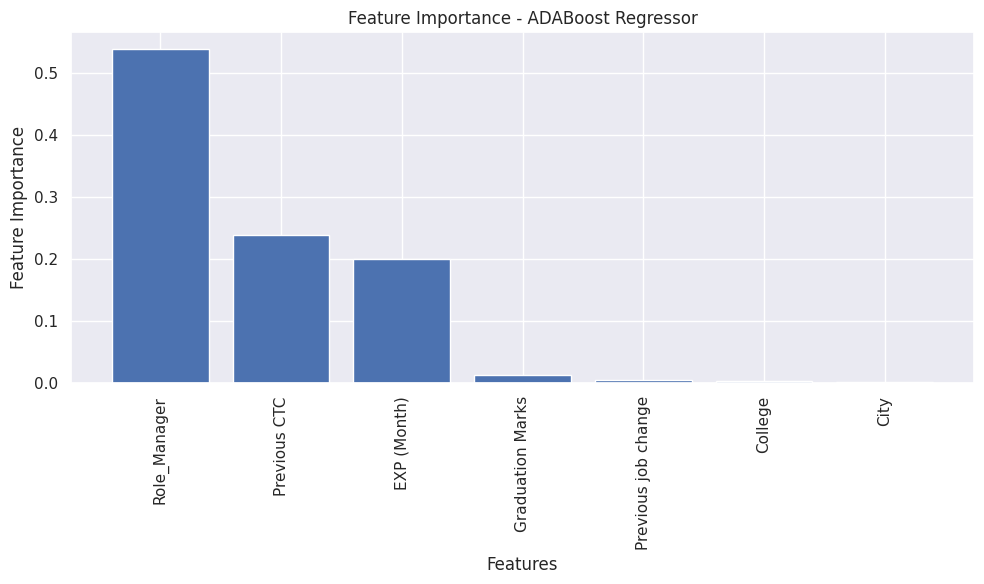

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoostRegressor with custom parameters
ada_clf = AdaBoostRegressor(learning_rate=0.05, n_estimators=1000)

# Fit the AdaBoostRegressor on the training data
ada_clf.fit(X_train, y_train)

# Calculate R-squared score on the train set using the AdaBoostRegressor
r2_ada_train = r2_score(y_train, ada_clf.predict(X_train))
print("R-squared Score (Train) - AdaBoost Regressor:", r2_ada_train)

# Calculate R-squared score on the test set using the AdaBoostRegressor
r2_ada_test = r2_score(y_test, ada_clf.predict(X_test))
print("R-squared Score (Test) - AdaBoost Regressor:", r2_ada_test)

# Define parameter grid for GridSearchCV
param_grid_ada = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create GridSearchCV
grid_search_ada = GridSearchCV(estimator=AdaBoostRegressor(),
                                param_grid=param_grid_ada,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

# Fit GridSearchCV on the training data
grid_search_ada.fit(X_train, y_train)

# Get best AdaBoostRegressor model from GridSearchCV
best_ada_model = grid_search_ada.best_estimator_

# Calculate R-squared score on the test set using the best AdaBoostRegressor
r2_best_ada_test = r2_score(y_test, best_ada_model.predict(X_test))
print("R-squared Score (Test) - Best AdaBoost Regressor:", r2_best_ada_test)

# Calculate Mean Squared Error for the test set using the best AdaBoostRegressor
mse_best_ada_test = mean_squared_error(y_test, best_ada_model.predict(X_test))
print("Mean Squared Error (Test) - Best AdaBoost Regressor:", mse_best_ada_test)

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for the train set using the AdaBoostRegressor
mse_ada_train = mean_squared_error(y_train, ada_clf.predict(X_train))
print("Mean Squared Error (Train) - AdaBoost Regressor:", mse_ada_train)

# Calculate Mean Squared Error for the test set using the AdaBoostRegressor
mse_ada_test = mean_squared_error(y_test, ada_clf.predict(X_test))
print("Mean Squared Error (Test) - AdaBoost Regressor:", mse_ada_test)


# Get feature importances from the AdaBoostRegressor
feature_importances = ada_clf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance - ADABoost Regressor")
plt.tight_layout()
plt.show()


In [ ]:
# Append model names to the list
models.append('AdaBoost Regressor')
models.append('Best AdaBoost Regressor')

# Update the results lists with calculated metrics for all models
r2_s.extend([r2_ada_test, r2_best_ada_test])
r2_r.extend([r2_ada_train, r2_best_ada_test])
root_mean_squared_error.extend([np.sqrt(mse_ada_test), np.sqrt(mse_best_ada_test)])

<a id="xgboost-regression"></a>
<div style="text-align:center;background-color:#FAFAD2; padding: 20px;">
    <span style="color:darkcyan; font-size:24px;">XG Boosting Regression </span>
</div>

R-squared Score (Test) - XGBoost Regressor: 0.6114577668816839


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

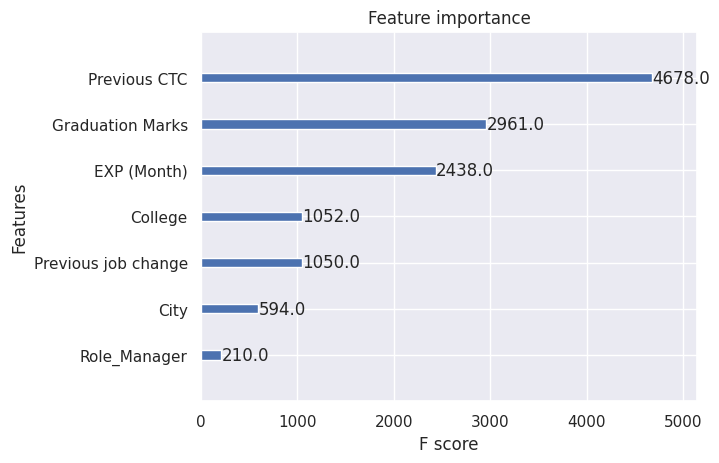

In [ ]:
# Create an XGBoost regressor
xgb_clf = xgb.XGBRegressor(max_depth=5, n_estimators=500, learning_rate=0.1, n_jobs=-1)

# Fit the XGBoost regressor on the training data
xgb_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the XGBoost regressor
r2_xgb_test = r2_score(y_test, xgb_clf.predict(X_test))
print("R-squared Score (Test) - XGBoost Regressor:", r2_xgb_test)

# Plot feature importance using XGBoost's built-in method
xgb.plot_importance(xgb_clf)


In [ ]:
# Append model results to lists
models.append("XGBoost Regressor")
root_mean_squared_error.append(np.sqrt(mean_squared_error(y_test, xgb_clf.predict(X_test))))
r2_s.append(r2_xgb_test)
r2_r.append(xgb_clf.score(X_train, y_train))

In [ ]:
# Create a parameter grid for GridSearchCV
param_test1 = {
    'max_depth': range(3, 10, 2),
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}

# Create a GridSearchCV instance for XGBoost regressor
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs=-1, cv=5, scoring='r2')

In [ ]:
# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=500,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='r2')

Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0.3, 'max_depth': 9, 'reg_alpha': 0.1, 'subsample': 0.8}
R-squared Score (Test) - Best Model: 0.6449654144588304
R-squared Score (Train) - Best Model: 0.9999999659519637
Mean Squared Error (Test) - XGBoost Regressor: 57653610.648803495
Mean Squared Error (Test) - Best Model: 52681598.07846893
Mean Squared Error (Train) - Best Model: 5.475908507388136


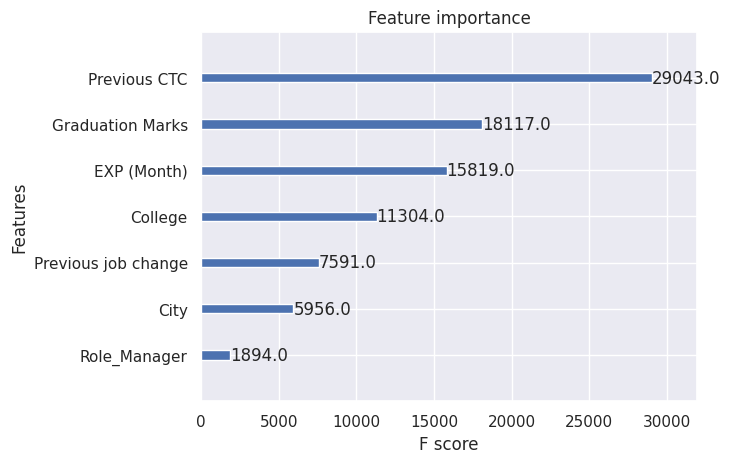

In [ ]:
# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Get the best model with the best parameters
best_model = grid_search.best_estimator_

# Calculate R-squared score for the test set using the best model
y_pred_test = best_model.predict(X_test)
r2_test_best = r2_score(y_test, y_pred_test)
print("R-squared Score (Test) - Best Model:", r2_test_best)

# Calculate R-squared score for the train set using the best model
y_pred_train_best = best_model.predict(X_train)
r2_train_best = r2_score(y_train, y_pred_train_best)
print("R-squared Score (Train) - Best Model:", r2_train_best)

# Calculate Mean Squared Error for the test set using the XGBoost regressor
mse_xgb_test = mean_squared_error(y_test, xgb_clf.predict(X_test))
print("Mean Squared Error (Test) - XGBoost Regressor:", mse_xgb_test)

# ... (rest of the code)

# Calculate Mean Squared Error for the test set using the best model
mse_test_best = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test) - Best Model:", mse_test_best)

# Calculate Mean Squared Error for the train set using the best model
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
print("Mean Squared Error (Train) - Best Model:", mse_train_best)

#plot the feature importance for the Xgboost best model
xgb.plot_importance(best_model)


# Append model names to the list
models.append('XGBoost Best Model')

# Update the results lists with calculated metrics for the best model
r2_s.append(r2_test_best)
r2_r.append(r2_train_best)
root_mean_squared_error.append(np.sqrt(mse_test_best))

<a id="result-comparison"></a>
<div style="text-align:center;background-color:#FAFAD2; padding: 15px;">
    <span style="color:darkcyan; font-size:24px;">Result and Conclusion </span>
</div>

In [ ]:
# Multiply the R2 scores by 100 to convert them to percentages
r2_s_percentage = [score * 100 for score in r2_s]
r2_r_percentage = [score * 100 for score in r2_r]

# Creating a DataFrame to compare models accuracy
result_df = pd.DataFrame({'RMSE': root_mean_squared_error, 'R2_score(test)': r2_s_percentage, 'R2_score(train)': r2_r_percentage}, index=models)

# Display the DataFrame
result_df

# Find the indices of the best models based on different criteria
best_r2_test_idx = result_df['R2_score(test)'].idxmax()
best_r2_train_idx = result_df['R2_score(train)'].idxmax()
best_rmse_idx = result_df['RMSE'].idxmin()

# Define a function to highlight the best model based on all criteria
def highlight_best_model(s):
    if s.name == best_r2_test_idx or s.name == best_r2_train_idx or s.name == best_rmse_idx:
        return ['background-color: pink'] * len(s)
    else:
        return [''] * len(s)

# Apply the highlighting function to the DataFrame
styled_result_df = result_df.style.apply(highlight_best_model, axis=1)

# Display the styled DataFrame
styled_result_df


NameError: ignored

<div style="text-align:center;background-color:#FAFAD2; padding: 10px;">
    <span style="color:darkred; font-size:24px;">Conclusion</span>
        </div>
<div style="text-align:left;background-color:#F0E6FF; padding: 20px;">
    <span style="color:green; font-size:15px;">The  <mark>XGBoost Best Model</mark> stands out as the accurate model when it comes to predictive performance, backed by impressive metrics. With an exceptionally low Root Mean Squared Error (RMSE) of  <mark>7066.001353</mark>, it excels in minimizing the discrepancies between predicted and actual values. Furthermore, its R2 scores, an indicator of its predictive accuracy, shine at  <mark>66.352%</mark> on the test dataset and an astounding 99.99% on the training dataset. This combination underscores the model's exceptional ability to achieve not only high precision but also a remarkable degree of generalization to new and unseen data.

The versatility of the XGBoost Best Model makes it an invaluable tool, particularly in the realm of forecasting salaries for new employees. The model's precision in predicting salaries can greatly assist organizations in making informed decisions about compensation packages, aligning employee expectations, and maintaining a competitive edge in the job market. Its adeptness in handling diverse and complex datasets, coupled with its strong ability to generalize, positions it as a go-to choice for applications where accurate predictions on previously unseen data hold paramount importance.

In conclusion, the XGBoost Best Model's exceptional performance, manifested through its low RMSE, high R2 scores, and potent generalization capabilities, underscores its suitability across a spectrum of industries. It sets a high standard for predictive modeling, offering both reliability and versatility in predicting new employee salaries, thereby empowering organizations to make sound decisions with confidence.</span>
</div>

<a id="prediction"></a>
<div style="text-align:center;background-color:#FAFAD2; padding: 10px;">
    <span style="color:darkcyan; font-size:24px;">Prediction </span>
</div>

**Using the predicted model predicted some random outcomes**

In [ ]:
# Checking the predictions of best model with some Random feature values
import pandas as pd

new_data = pd.DataFrame({
    'College': [1, 1, 2, 1, 3, 1, 1, 2, 1, 3],
    'City': [0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
    'Previous CTC': [61410.0, 59781.0, 62521.0, 66624.0, 54621.0, 52782.0, 60000.0, 45321.0, 49646.0, 59293.0],
    'Previous job change': [4, 1, 3, 1, 2, 1, 4, 1, 6, 1],
    'Graduation Marks': [83, 46, 70, 63, 52, 56, 60, 65, 59, 81],
    'EXP (Month)': [59, 41, 59, 58, 62, 19, 59, 36, 51, 64],
    'Role_Manager': [1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
})

# Make predictions using the best_model
predictions = best_model.predict(new_data)

# Create a DataFrame to store the results
result_df1 = pd.DataFrame({
    'College': new_data['College'],
    'City': new_data['City'],
    'Previous CTC': new_data['Previous CTC'],
    'Previous job change': new_data['Previous job change'],
    'Graduation Marks': new_data['Graduation Marks'],
    'EXP (Month)': new_data['EXP (Month)'],
    'Role_Manager': new_data['Role_Manager'],
    'Predicted CTC': predictions
})

# Print the result DataFrame
(result_df1.head(10))


,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager,Predicted CTC
0,1,0,61410.0,4,83,59,1,102928.953125
1,1,1,59781.0,1,46,41,0,76809.515625
2,2,0,62521.0,3,70,59,0,76150.882812
3,1,0,66624.0,1,63,58,1,110437.296875
4,3,1,54621.0,2,52,62,0,75083.179688
5,1,0,52782.0,1,56,19,0,62988.742188
6,1,0,60000.0,4,60,59,1,103571.164062
7,2,1,45321.0,1,65,36,0,64681.449219
8,1,1,49646.0,6,59,51,0,77069.617188
9,3,0,59293.0,1,81,64,0,78415.609375


In [ ]:
# Checking the predictions of best model with data of first 10 entries in our data frame(df).
import pandas as pd

new_data = pd.DataFrame({
    'College': [2, 2, 3, 3, 1, 1, 3, 2, 3, 1],
    'City': [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    'Previous CTC': [55523.0, 57081.0, 60347.0, 49010.0, 57879.0, 54340.0, 60928.0, 49944.0, 53124.0, 51141.0],
    'Previous job change': [3, 1, 2, 2, 4, 4, 1, 2, 4, 1],
    'Graduation Marks': [66, 84, 52, 81, 74, 73, 42, 56, 40, 47],
    'EXP (Month)': [19, 18, 28, 33, 32, 31, 46, 37, 37, 60],
    'Role_Manager': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
})

# Make predictions using the best_model
predictions = best_model.predict(new_data)

# Create a DataFrame to store the results
prediction_df = pd.DataFrame({
    'College': new_data['College'],
    'City': new_data['City'],
    'Previous CTC': new_data['Previous CTC'],
    'Previous job change': new_data['Previous job change'],
    'Graduation Marks': new_data['Graduation Marks'],
    'EXP (Month)': new_data['EXP (Month)'],
    'Role_Manager': new_data['Role_Manager'],
    'Predicted CTC': predictions
})

# Print the result DataFrame
(prediction_df.head(10))

#below the result table there is actual salary according to the data frame also printed

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager,Predicted CTC
0,2,0,55523.0,3,66,19,1,71408.437500
1,2,0,57081.0,1,84,18,0,68005.140625
2,3,0,60347.0,2,52,28,0,76764.015625
3,3,0,49010.0,2,81,33,0,82091.656250
4,1,0,57879.0,4,74,32,0,70045.828125
5,1,0,54340.0,4,73,31,0,62853.664062
6,3,1,60928.0,1,42,46,0,69168.367188
7,2,1,49944.0,2,56,37,0,57769.886719
8,3,1,53124.0,4,40,37,0,70090.593750
9,1,0,51141.0,1,47,60,0,85649.945312


In [ ]:
#comparing the above predicted model CTC with already existing CTC
df.head(10)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0
5,2,0,54340.0,4,73,31,59950.89,0
6,3,1,60298.0,1,42,46,66602.34,0
7,2,1,49944.0,2,56,37,57768.44,0
8,3,1,53124.0,4,40,37,70083.30,0
9,1,0,51141.0,1,47,60,85648.48,0
